In [1]:
from allthethings import PyNetwork, PyPipe_ps
from allthethings import PyBC_opt_dh
import numpy as np
import matplotlib.pyplot as plt
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
fi = "indata/7deSeptiembre.inp"
fc = "indata/7deSeptiembre.config"
mtype = 1
n1 = PyNetwork(fi,fc,mtype)
Q0 = np.ones(n1.M+1);
#for i in range(n1.M/2,n1.M+1):
#    Q0[i] = 0
#n1.setbVal(0,Q0)    

In [3]:
dt = n1.T/n1.M
V0 = n1.getTotalVolume()
n1.runForwardProblem(dt)


In [4]:
print n1.T
print n1.solve_time
print dt

1200.0
104.469965
0.0545454545455


In [5]:
def idx_t(i,j,n,N):
    return (2*(N+2)*n+(N+2)*i+j)

2198.32576244
1751.58241772
14
[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
113.681043826
dx/dt = 183.333333


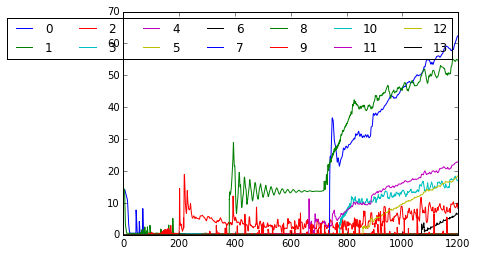

In [6]:
print n1.getTotalVolume()-V0
print V0
print n1.Nedges
print n1.a
print max(n1.cmax)
mdx = min([n1.Ls[i]/n1.Ns[i] for i in range(n1.Nedges)])
T = n1.T
M = n1.M
dt = T/M
print "dx/dt = %f" % (mdx/dt)
pipes = [PyPipe_ps(n1.Ns[i], n1.Ds[i], n1.Ls[i], n1.M, n1.a[i]) for i in range(n1.Nedges)]
t = linspace(0,T,M+1)
for i in range(0,14):
    qhist = n1.qhist(i)
    P = [pipes[i].pbar(qhist[idx_t(0,n1.Ns[i]/2,n, n1.Ns[i])],False) for n in range(M+1)]
    plot(t,P) 
    legend(['%d'%i for i in range(n1.Nedges)], ncol=7)

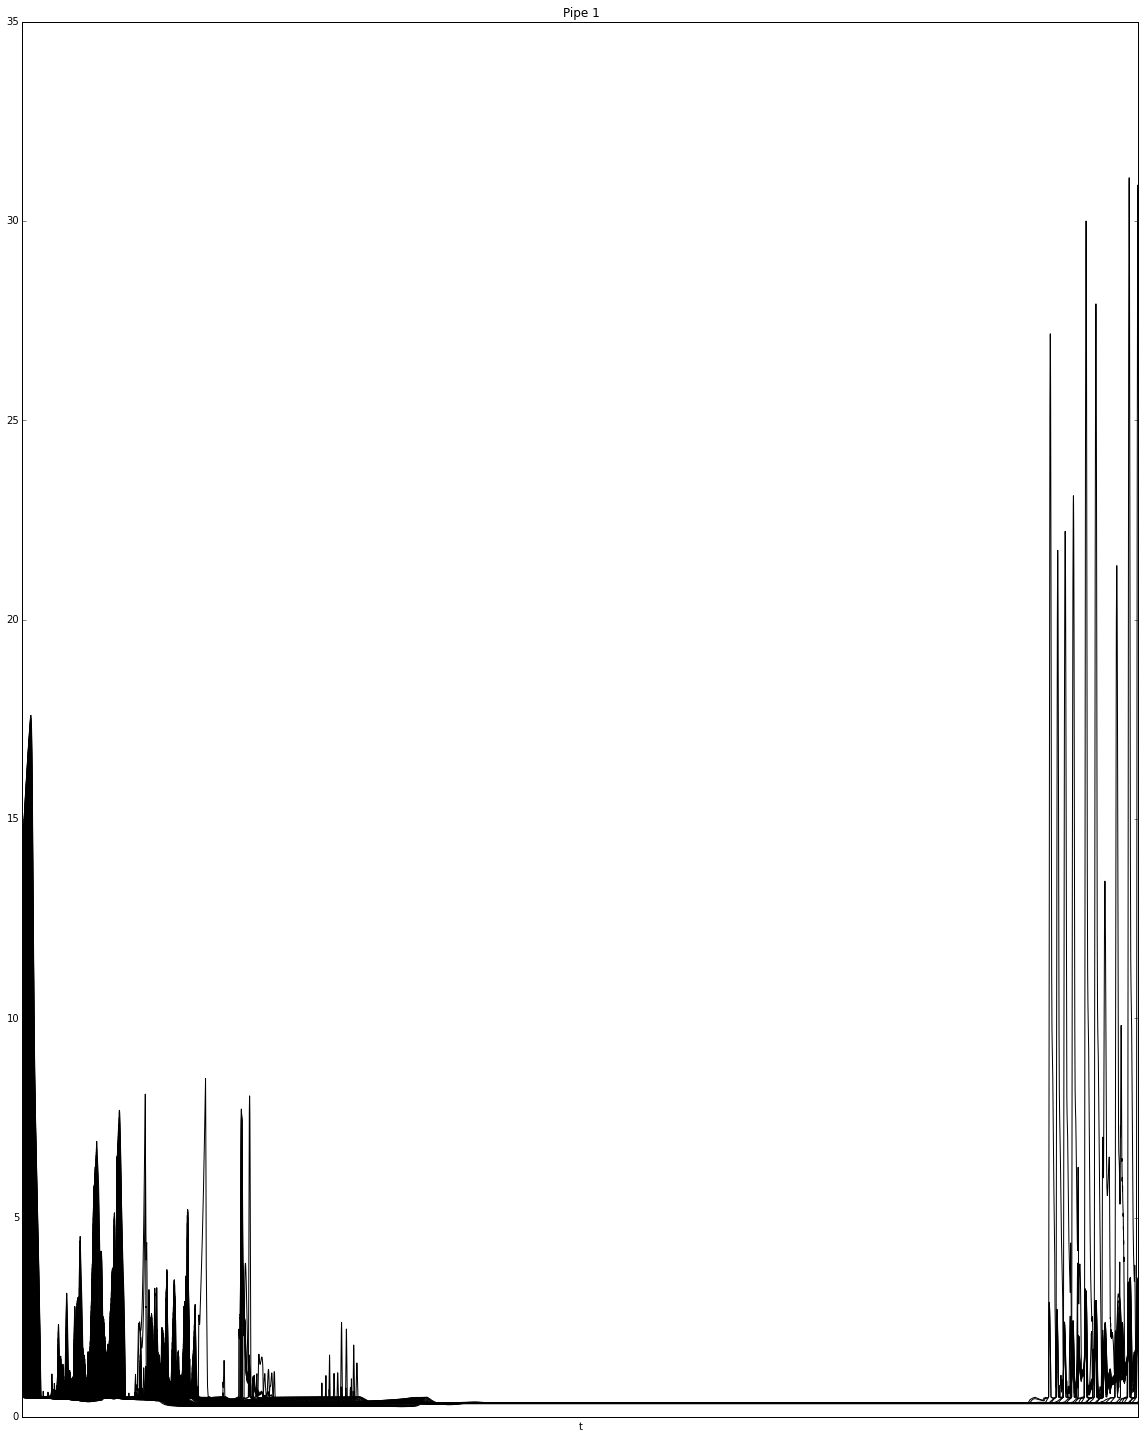

In [7]:
i = 1
M = n1.M
fig = figure(figsize= (20,25))
#for i in range(10,11):
for J in range(1,n1.Ns[i]):
#        subplot(14,1,i)
        qhist = n1.qhist(i)
        P = [pipes[i].pbar(qhist[idx_t(0,J,n, n1.Ns[i])],False) for n in range(M+1)]
        plot(t,P,'k')
        ax = gca()
        ax.set_title('Pipe %d'%i)
        ax.set_xticks([])
ax.set_xlabel('t')
#savefig("../blargh.eps", format = 'eps')

100
(22001, 4)
(0, 35)


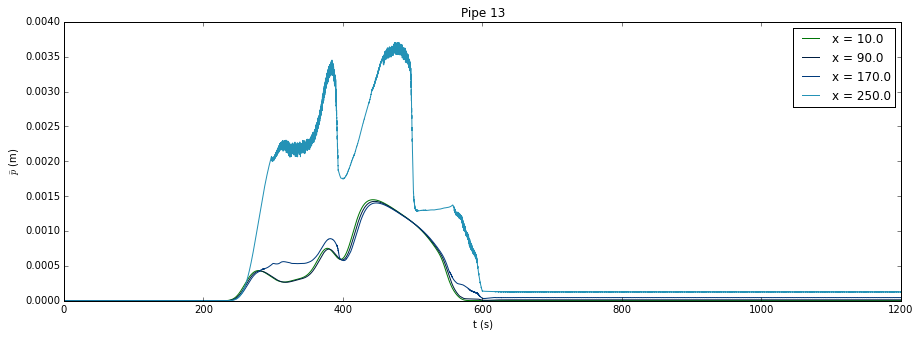

In [103]:
i = 10
M = n1.M
from matplotlib import cm
import matplotlib.colors as colors
fig = figure(figsize= (15,5))
qhist = n1.qhist(i)
xs = np.arange(1,n1.Ns[i]+1,8)
#set_clim(0,xs[-1])
t = np.linspace(0,n1.T,M+1)
print len(T)
P = np.zeros((len(t),len(xs)))
print shape(P)
SHIT = cm.get_cmap('ocean') 
cNorm  = colors.Normalize(vmin=0, vmax=xs[-1]+10)
scalarMap = cm.ScalarMappable(norm=cNorm, cmap=SHIT)
print scalarMap.get_clim()
dx= n1.Ls[i]/n1.Ns[i]
for J in range(len(xs)):
    #P[:,J]=[pipes[i].pbar(qhist[idx_t(0,xs[J],n, n1.Ns[i])],False) for n in range(M+1)]
    cval = scalarMap.to_rgba(xs[J])
    P =[pipes[i].pbar(qhist[idx_t(0,xs[J],n, n1.Ns[i])],False) for n in range(M+1)]
    q=plot(t,P,color =cval,label="x = %.1f"%(dx*xs[J]))
    
ax = gca()
ax.set_title('Pipe %d'%i)
ax.set_xlabel('t (s)')
ax.set_ylabel(r'$\bar{p}$ (m)')
legend()
savefig("../sensors_pipe%d.eps"%i, format='eps')

In [70]:
cm.to_rgba(xs)

AttributeError: 'module' object has no attribute 'to_rgba'

In [17]:
#savefig("../blargh.eps", format = 'eps')
skip= 50
#Ms = np.linspace(0,n1.T,(M+1)/skip)
Ms= np.arange(0,M+1,skip)
print len(Ms)
Ns = range(1,n1.Ns[i]+1)
Pmat = np.zeros((len(Ms),len(Ns)))
i = 10
for J in Ns:
    P = [pipes[i].pbar(qhist[idx_t(0,J,n, n1.Ns[i])],False) for n in Ms]
    Pmat[:,J-1]=P
fig = plt.figure()
x = np.arange(1,n1.Ns[i]+1)
T,X = np.meshgrid(Ms,x)
ax = fig.add_subplot(111, projection='3d')
#ax.plot_wireframe(T,X,np.transpose(P))
ax.plot_wireframe(T,X,P)
ax.set_zlim3d(0,0.00002)
#ax.plot_wireframe?
print shape(X)
print shape(T)
print shape(Pmat)
print len(Pmat[0,:])
print len(Ms)
print len(Ns)

441


ValueError: Unknown projection '3d'

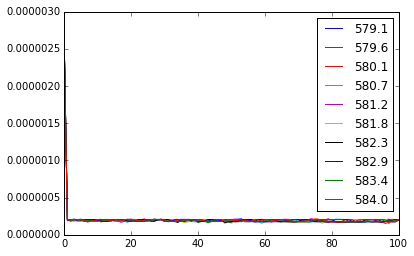

In [12]:
N =n1.Ns[i]
x = linspace(0,N,N+1)
for m in range(10616,10716,10):
    #fig = figure()
    #ax = gca()
    P = [pipes[i].pbar(qhist[idx_t(0,k,m, N)],False) for k in range(0,N+1)]
    #P =  [qhist[idx_t(0,k,m, N)] for k in range(0,N+1)]
    plot(x,P,label = "%.1f"%(dt*m))
    legend()
    #ax.set_ylim(0,20)
    #savefig("../test/damn%d.png"%m,format='png')
#xlim(0,10)


In [59]:
for i in range(n1.Nedges):
    print "%d  %.3f"%(i,n1.Ls[i]/n1.Ns[i])

0  10.000
1  10.000
2  10.000
3  10.000
4  10.000
5  10.000
6  10.000
7  10.000
8  10.000
9  10.000
10  10.000
11  10.000
12  10.000
13  10.000


In [60]:
Vf = n1.getTotalVolume()

In [20]:
print Vf-V0

1323.72712785


In [112]:
qhist = n1.qhist(10)
print pipes[i].HofA(qhist[idx_t(0,1,0, n1.Ns[i])],False)
print pipes[i].HofA(qhist[idx_t(0,1,0, n1.Ns[i])],False)
print pipes[i].pbar(1e-7,False)

0.01
0.01
7.66314673754e-06
